In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

## Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


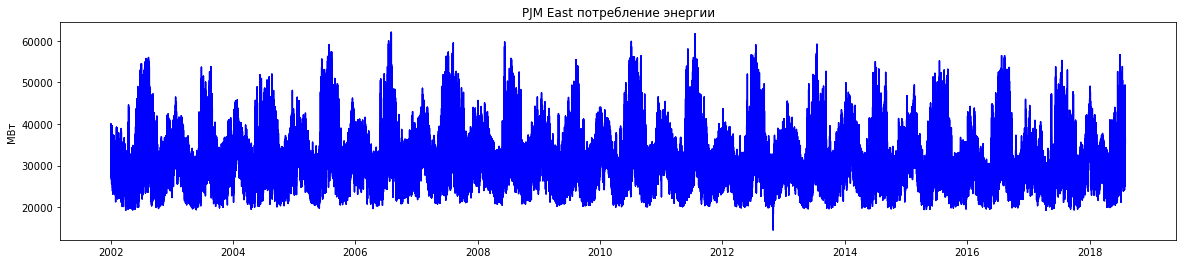

In [3]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [4]:
data_d = data.copy().resample('W').mean()
data_d.head(15)

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.580420,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.500000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.500000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-02-10,31150.517857,2002.0,2.000000,7.000000,1.0,38.000000,6.0,3.000000,11.500000,0.000000,0.000000,0.000000
2002-02-17,30616.565476,2002.0,2.000000,14.000000,1.0,45.000000,7.0,3.000000,11.500000,0.000000,0.142857,0.000000
2002-02-24,29144.130952,2002.0,2.000000,21.000000,1.0,52.000000,8.0,3.000000,11.500000,0.142857,0.000000,0.142857
2002-03-03,29869.011905,2002.0,2.428571,16.000000,1.0,59.000000,9.0,3.000000,11.500000,0.000000,0.000000,0.000000


Удалим данные о часах, днях в неделе, в месяце и в году т.к. они потеряли актуальность

In [5]:
data_d.drop('hour', axis=1, inplace=True)
data_d.drop('dayofweek', axis=1, inplace=True)
data_d.drop('dayofmonth', axis=1, inplace=True)
data_d.drop('dayofyear', axis=1, inplace=True)

Поскольку в годовом развороте ряда тренда нет (временные ряды 2 и 3), то признак 'year' можно исключить.

In [6]:
data_d.drop('year', axis=1,inplace=True)

In [7]:
data_d

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
2018-07-08,38459.982143,7.000000,3.0,27.0,0.142857,0.142857,0.142857
2018-07-15,36420.035714,7.000000,3.0,28.0,0.000000,0.000000,0.000000
2018-07-22,35612.095238,7.000000,3.0,29.0,0.000000,0.000000,0.000000


Можно построить интегральный признак используя кластер-анализ

In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_d.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

In [9]:
X_t

array([[  1.9259884 , -43.884468  ],
       [ 38.975964  ,  16.53204   ],
       [-26.93825   ,  27.731916  ],
       ...,
       [  1.4437006 ,   8.452007  ],
       [ -0.29045683,   8.877795  ],
       [ -0.4903881 ,   7.823099  ]], dtype=float32)

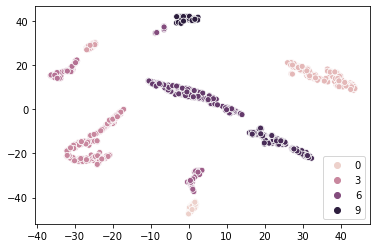

In [10]:
clast_0 = DBSCAN(eps=3, leaf_size=15)
clast_1 = DBSCAN(eps=3, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

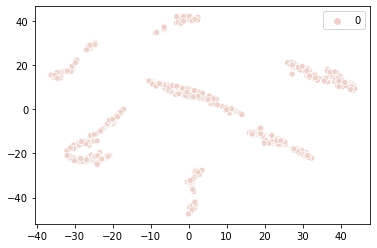

In [11]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast)
plt.show()

In [12]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  1
Число кластеров в календаре:  10


In [13]:
data_d['day_week_month'] = X_clast
data_d.iloc[np.where(data_d['day_week_month']==0)[0]].iloc[:10,:]

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,
2002-01-06,32392.160839,1.0,1.0,1.0,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,1.0,1.0,4.0,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2.0,1.0,8.0,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,1.0,1.0,4.0,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2.0,1.0,8.0,0.142857,0.0,0.142857,0
2004-01-25,37925.613095,1.0,1.0,4.0,0.142857,0.0,0.142857,0
2004-02-22,33083.369048,2.0,1.0,8.0,0.142857,0.0,0.142857,0
2005-01-23,38833.892857,1.0,1.0,3.0,0.142857,0.0,0.142857,0
2005-02-27,33497.928571,2.0,1.0,8.0,0.142857,0.0,0.142857,0


In [14]:
data_d.iloc[np.where(data_d['day_week_month']==2)[0]].iloc[:10,:]

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,
2002-01-20,31452.880952,1.0,1.0,3.0,0.0,0.142857,0.0,2
2002-02-17,30616.565476,2.0,1.0,7.0,0.0,0.142857,0.0,2
2003-01-19,35999.547619,1.0,1.0,3.0,0.0,0.142857,0.0,2
2003-02-16,35533.589286,2.0,1.0,7.0,0.0,0.142857,0.0,2
2004-01-18,36814.470238,1.0,1.0,3.0,0.0,0.142857,0.0,2
2004-02-15,33151.982143,2.0,1.0,7.0,0.0,0.142857,0.0,2
2005-01-16,32488.148810,1.0,1.0,2.0,0.0,0.142857,0.0,2
2005-02-20,33284.934524,2.0,1.0,7.0,0.0,0.142857,0.0,2
2006-01-15,31858.672619,1.0,1.0,2.0,0.0,0.142857,0.0,2


 Построим 2 компоненты по признакам из календаря , без значений ряда и допишем их в общую таблицу data_d.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [16]:
data_d['pca1']=Xpca[:,0]
data_d['pca2']=Xpca[:,1]

Добавим к нашей модели 1-е разности

In [17]:
first_diff =np.array(data_d.iloc[1:,0].values - data_d.iloc[:-1,0].values).astype('float32') 
data_d['diff1'] = 0
data_d['diff1'] =  data_d['diff1'].astype('float') 
data_d['diff1'].values[1:] = first_diff

In [18]:
first_diff_d =(first_diff) / data_d.iloc[1:,0].values
data_d['diff1_d'] = 0
data_d['diff1_d'] =  data_d['diff1_d'].astype('float') 
data_d['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

In [19]:
first_diff_l =np.log(data_d.iloc[1:,0].values) 
data_d['diff1_l'] = 0
data_d['diff1_l'] =  data_d['diff1_l'].astype('float') 
data_d['diff1_l'].values[1:] = first_diff_l

Добавим скользящее среднее по всей модели с глубиной 26 недель. Размер окна определен длиной полугодовых циклов.

In [20]:
data_d['d_w26']=data_d['PJME_MW'].rolling(window=26).mean()

А теперь добавим еще и экспонентциальную среднюю.

In [21]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_d['exp_0_05'] = exponential_smoothing(data_d['PJME_MW'], 0.05)

In [22]:
data_d.iloc[10:15,:]

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,d_w26,exp_0_05
Date,,,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,1.0,11.0,0.0,0.0,0.0,1,-2.037281,-0.353362,-768.130981,-0.026790,10.263704,NaN,31436.852496
2002-03-24,29927.488095,3.0,1.0,12.0,0.0,0.0,0.0,1,-1.999420,-0.360328,1254.708374,0.041925,10.306533,NaN,31361.384276
2002-03-31,27595.869048,3.0,1.0,13.0,0.0,0.0,0.0,1,-1.961559,-0.367293,-2331.619141,-0.084492,10.225421,NaN,31173.108514
2002-04-07,28308.778443,4.0,2.0,14.0,0.0,0.0,0.0,3,-1.237759,-0.479240,712.909424,0.025183,10.250927,NaN,31029.892011
2002-04-14,27182.482143,4.0,2.0,15.0,0.0,0.0,0.0,3,-1.199898,-0.486205,-1126.296265,-0.041435,10.210328,NaN,30837.521517


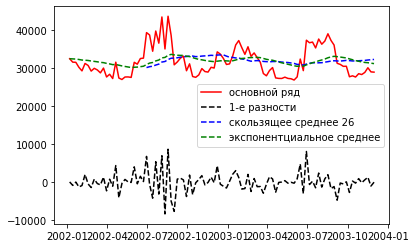

In [23]:
N100=100
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_d.index[:N100],data_d['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_d.index[:N100],data_d['d_w26'][:N100],'--b',label ='скользящее среднее 26')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

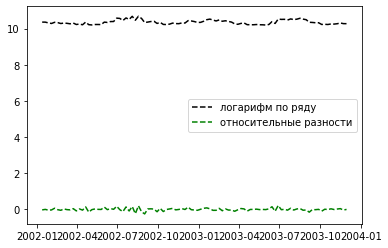

In [24]:
N100=100
plt.plot(data_d.index[1:N100],data_d['diff1_l'][1:N100],'--k',label ='логарифм по ряду')
plt.plot(data_d.index[1:N100],data_d['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

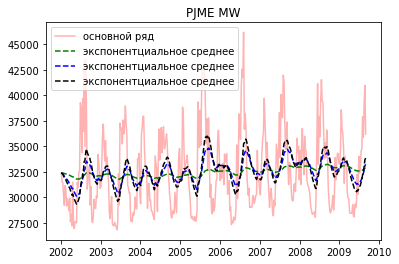

In [25]:
data_d['exp_0_01'] = exponential_smoothing(data_d['PJME_MW'], 0.01)
data_d['exp_0_03'] = exponential_smoothing(data_d['PJME_MW'], 0.03)
data_d['exp_0_04'] = exponential_smoothing(data_d['PJME_MW'], 0.04)
data_d['exp_0_06'] = exponential_smoothing(data_d['PJME_MW'], 0.06)
data_d['exp_0_07'] = exponential_smoothing(data_d['PJME_MW'], 0.07)
data_d['exp_0_08'] = exponential_smoothing(data_d['PJME_MW'], 0.08)

N100=400
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_d.index[:N100],data_d['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [26]:
for i, col in enumerate(data_d.columns):
    print(f'{i}: {col}')

0: PJME_MW
1: month
2: quarter
3: weekofyear
4: is_holiday
5: is_prev_holiday
6: is_next_holiday
7: day_week_month
8: pca1
9: pca2
10: diff1
11: diff1_d
12: diff1_l
13: d_w26
14: exp_0_05
15: exp_0_01
16: exp_0_03
17: exp_0_04
18: exp_0_06
19: exp_0_07
20: exp_0_08


In [27]:
data_d.iloc[:26, 13]=0

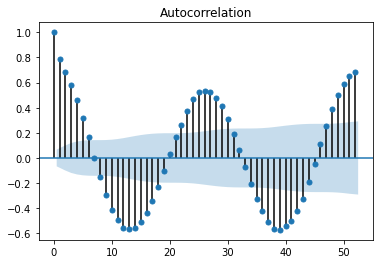

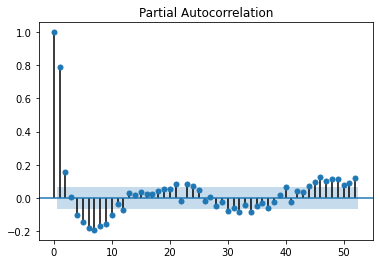

In [28]:
sm.graphics.tsa.plot_acf(data_d['PJME_MW'].values, lags=52)
plt.show()

#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(data_d['PJME_MW'].values, lags=52)
plt.show()

In [29]:
p = 26
for i in range(p):
    data_d['t'+str(p-i)]=0
    data_d['t'+str(p-i)].values[p:] = data_d['PJME_MW'].values[i:-(p)+i]

In [30]:
p = 26
for i in range(p):
    data_d['d'+str(p-i)]=0
    data_d['d'+str(p-i)].values[p:] = data_d['diff1'].values[i:-(p)+i]

Итоговая система признаков

In [31]:
data_d.tail(10)

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-03,30945.601190,5.428571,2.000000,22.0,0.142857,0.000000,0.142857,5,-0.427246,1.222458,...,-641,-2980,910,-1162,42,-2200,2588,-1531,1238,2528
2018-06-10,28615.154762,6.000000,2.000000,23.0,0.000000,0.000000,0.000000,3,-0.558974,-0.603449,...,-2980,910,-1162,42,-2200,2588,-1531,1238,2528,563
2018-06-17,30316.940476,6.000000,2.000000,24.0,0.000000,0.000000,0.000000,3,-0.521113,-0.610414,...,910,-1162,42,-2200,2588,-1531,1238,2528,563,-2330
2018-06-24,34711.648810,6.000000,2.000000,25.0,0.000000,0.000000,0.000000,3,-0.483252,-0.617380,...,-1162,42,-2200,2588,-1531,1238,2528,563,-2330,1701
2018-07-01,35911.839286,6.142857,2.142857,26.0,0.000000,0.000000,0.000000,3,-0.347400,-0.639343,...,42,-2200,2588,-1531,1238,2528,563,-2330,1701,4394
2018-07-08,38459.982143,7.000000,3.000000,27.0,0.142857,0.142857,0.142857,6,0.883255,2.815442,...,-2200,2588,-1531,1238,2528,563,-2330,1701,4394,1200
2018-07-15,36420.035714,7.000000,3.000000,28.0,0.000000,0.000000,0.000000,7,0.316270,-0.743258,...,2588,-1531,1238,2528,563,-2330,1701,4394,1200,2548
2018-07-22,35612.095238,7.000000,3.000000,29.0,0.000000,0.000000,0.000000,7,0.354131,-0.750223,...,-1531,1238,2528,563,-2330,1701,4394,1200,2548,-2039
2018-07-29,36581.821429,7.000000,3.000000,30.0,0.000000,0.000000,0.000000,7,0.391992,-0.757189,...,1238,2528,563,-2330,1701,4394,1200,2548,-2039,-807


## Постройте модель предсказания 1-й точки от текущей (h = 1)

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1

In [91]:
scl_target=StandardScaler() 
# p = 26
h=1
target = data_d['PJME_MW'].values[h+p:].reshape((data_d.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(839, 1)

In [92]:
scl_x=StandardScaler() 

X = data_d.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(839, 73)

In [93]:
X[:26,13]=0

In [94]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.97,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.00,  I=7
F-test=0.00,  I=8
F-test=0.00,  I=9
F-test=0.02,  I=10
F-test=0.01,  I=11
F-test=1.00,  I=12
F-test=0.01,  I=13
F-test=0.02,  I=14
F-test=0.01,  I=15
F-test=0.01,  I=16
F-test=0.02,  I=17
F-test=0.03,  I=18
F-test=0.04,  I=19
F-test=0.05,  I=20
F-test=0.24,  I=21
F-test=0.25,  I=22
F-test=0.23,  I=23
F-test=0.17,  I=24
F-test=0.10,  I=25
F-test=0.05,  I=26
F-test=0.02,  I=27
F-test=0.00,  I=28
F-test=0.01,  I=29
F-test=0.03,  I=30
F-test=0.08,  I=31
F-test=0.14,  I=32
F-test=0.21,  I=33
F-test=0.27,  I=34
F-test=0.30,  I=35
F-test=0.28,  I=36
F-test=0.20,  I=37
F-test=0.13,  I=38
F-test=0.06,  I=39
F-test=0.02,  I=40
F-test=0.00,  I=41
F-test=0.02,  I=42
F-test=0.07,  I=43
F-test=0.15,  I=44
F-test=0.30,  I=45
F-test=0.51,  I=46
F-test=0.00,  I=47
F-test=0.00,  I=48
F-test=0.00,  I=49
F-test=0.00,  I=50
F-test=0.01,  I=51
F-test=0.02,  I=52
F-t

In [95]:
data_d.columns[0], data_d.columns[12], data_d.columns[46]

('PJME_MW', 'diff1_l', 't1')

In [96]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(839, 5)

In [97]:
column_names = data_d.columns[sfk.get_support()]
column_names

Index(['PJME_MW', 'diff1_l', 't12', 't2', 't1'], dtype='object')

In [98]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(839, 8)

In [99]:
column_namesp = data_d.columns[sfp.get_support()]
column_namesp

Index(['PJME_MW', 'diff1_l', 't25', 't13', 't12', 't11', 't2', 't1'], dtype='object')

In [100]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(839, 5)

In [101]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 12 35 45 46]
Номера признаков лучших признаков по процентной форме:  [ 0 12 22 34 35 36 45 46]
Номера признаков для выбора по модели :  [ 0 12 36 38 46]


In [102]:
list_par = list(list_param_k.copy())
list_par.extend(list(list_param_p))
list_par.extend(list(list_param_m))
list_par = list(set(list_par))
print(list_par)

[0, 34, 35, 36, 38, 12, 45, 46, 22]


In [103]:
X_new = X[:,list_par]
data_d.columns[list_par]

Index(['PJME_MW', 't13', 't12', 't11', 't9', 'diff1_l', 't2', 't1', 't25'], dtype='object')

Разделение данных на тестовые и тренировочные 

In [104]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 1/06/2016

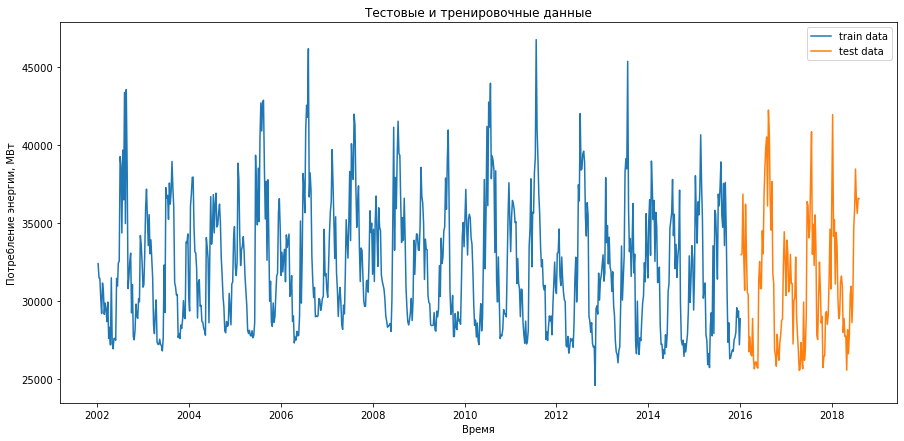

In [105]:
train, test = split_data( data_d, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [106]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [107]:
train.shape

(731, 73)

При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении иенно такой формы предсказания. Все модели возьмем в варианте параметров по умолчанию, кроме глубины деревьев.

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

In [109]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [110]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [111]:
X_test.shape

(108, 9)

In [112]:
y_test_pred_g = model_g.predict(X_test)

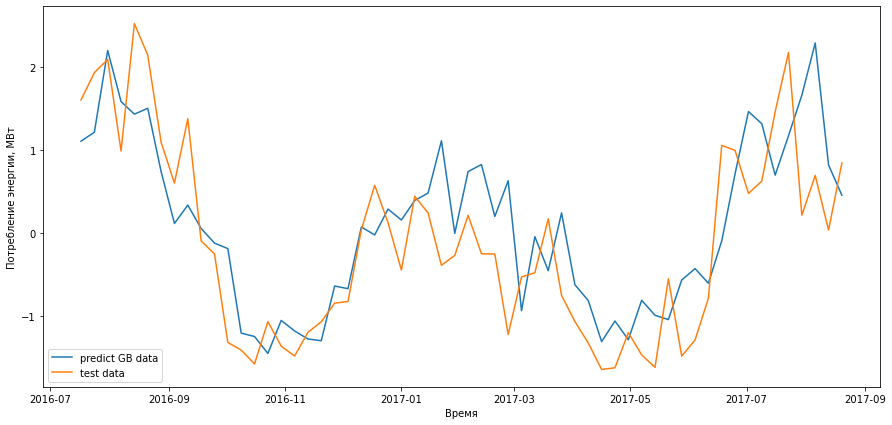

In [113]:
plt.figure( figsize=( 15, 7 ))

G = 50
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:-G],y_test_pred_g[:-G], label='predict GB data' )
plt.plot(test.index[h+p:-G],y_test[:-G], label='test data')

plt.legend()
plt.show()

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [115]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.4859609520724213 
ошибка mae  :   0.5542678664901742 
оценка R2 :   0.5513360166709177


In [116]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [117]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.047327331462477 %


In [118]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5,6,7,8,9,10], 
              "n_estimators":[100,200,300,400,500,600,700,800,900]}

#  randomized search
n_iter_search = 20

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.668 (std: 0.080)
Parameters: {'n_estimators': 100, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.664 (std: 0.065)
Parameters: {'n_estimators': 100, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.661 (std: 0.066)
Parameters: {'n_estimators': 100, 'max_depth': 2}



D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Выбираем модель с рангом 3. {'n_estimators':100, 'max_depth': 2} и проведем ее обучение на тренировочном наборе.

In [119]:
model_g_best = GradientBoostingRegressor(max_depth=2,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                                      y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.496498579938816 %


## Постройте модель предсказания 4-й точки от текущей (h = 4)

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1

In [64]:
scl_target=StandardScaler() 
# p = 26
h=4
target = data_d['PJME_MW'].values[h+p:].reshape((data_d.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(836, 1)

In [65]:
scl_x=StandardScaler() 

X = data_d.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(836, 73)

In [66]:
X[:26,13]=0

In [67]:
f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.52,  I=0
F-test=0.01,  I=1
F-test=0.01,  I=2
F-test=0.01,  I=3
F-test=0.03,  I=4
F-test=0.03,  I=5
F-test=0.03,  I=6
F-test=0.05,  I=7
F-test=0.01,  I=8
F-test=0.04,  I=9
F-test=0.09,  I=10
F-test=0.09,  I=11
F-test=0.53,  I=12
F-test=0.00,  I=13
F-test=0.07,  I=14
F-test=0.00,  I=15
F-test=0.04,  I=16
F-test=0.06,  I=17
F-test=0.07,  I=18
F-test=0.07,  I=19
F-test=0.06,  I=20
F-test=0.22,  I=21
F-test=0.43,  I=22
F-test=0.63,  I=23
F-test=0.82,  I=24
F-test=0.86,  I=25
F-test=0.80,  I=26
F-test=0.59,  I=27
F-test=0.35,  I=28
F-test=0.16,  I=29
F-test=0.06,  I=30
F-test=0.00,  I=31
F-test=0.02,  I=32
F-test=0.11,  I=33
F-test=0.27,  I=34
F-test=0.48,  I=35
F-test=0.72,  I=36
F-test=0.92,  I=37
F-test=1.00,  I=38
F-test=0.94,  I=39
F-test=0.66,  I=40
F-test=0.43,  I=41
F-test=0.20,  I=42
F-test=0.05,  I=43
F-test=0.00,  I=44
F-test=0.05,  I=45
F-test=0.23,  I=46
F-test=0.07,  I=47
F-test=0.06,  I=48
F-test=0.02,  I=49
F-test=0.01,  I=50
F-test=0.00,  I=51
F-test=0.00,  I=52
F-t

In [68]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(836, 5)

In [69]:
column_names = data_d.columns[sfk.get_support()]
column_names

Index(['t23', 't22', 't10', 't9', 't8'], dtype='object')

In [70]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(836, 8)

In [71]:
column_namesp = data_d.columns[sfp.get_support()]
column_namesp

Index(['t23', 't22', 't21', 't11', 't10', 't9', 't8', 't7'], dtype='object')

In [72]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(836, 5)

In [73]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [24 25 37 38 39]
Номера признаков лучших признаков по процентной форме:  [24 25 26 36 37 38 39 40]
Номера признаков для выбора по модели :  [ 1 24 25 38 39]


In [74]:
list_par = list(list_param_k.copy())
list_par.extend(list(list_param_p))
list_par.extend(list(list_param_m))
list_par = list(set(list_par))
print(list_par)

[1, 36, 37, 38, 39, 40, 24, 25, 26]


In [75]:
X_new = X[:,list_par]
data_d.columns[list_par]

Index(['month', 't11', 't10', 't9', 't8', 't7', 't23', 't22', 't21'], dtype='object')

Разделение данных на тестовые и тренировочные 

Для временного ряда "Потребление энергии" назначим датой разделения 1/06/2016

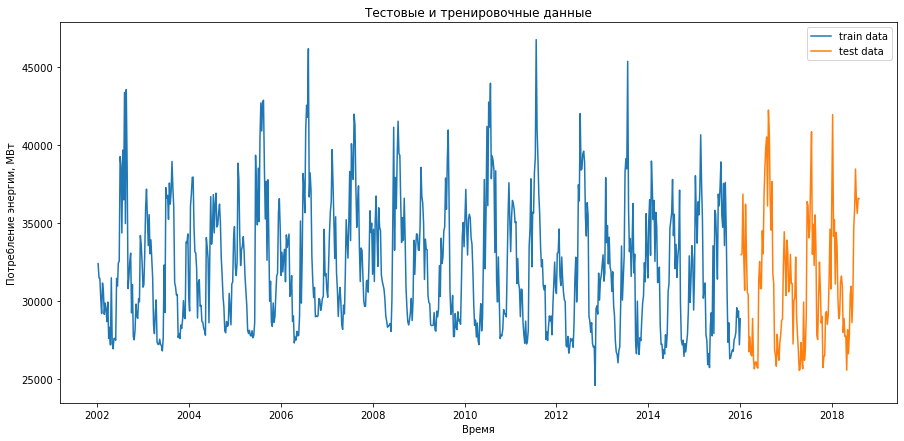

In [76]:
train, test = split_data( data_d, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [77]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [78]:
train.shape

(731, 73)

При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении иенно такой формы предсказания. Все модели возьмем в варианте параметров по умолчанию, кроме глубины деревьев.

In [79]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [80]:
model_g.fit( X_train, y_train )

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
X_test.shape

(105, 9)

In [82]:
y_test_pred_g = model_g.predict(X_test)

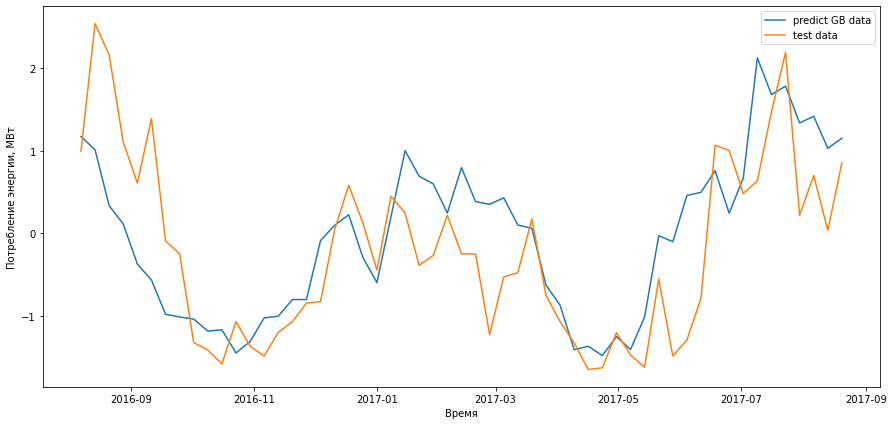

In [83]:
plt.figure( figsize=( 15, 7 ))

G = 50
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:-G],y_test_pred_g[:-G], label='predict GB data' )
plt.plot(test.index[h+p:-G],y_test[:-G], label='test data')

plt.legend()
plt.show()

In [84]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.6629634512573347 
ошибка mae  :   0.6069235402595722 
оценка R2 :   0.33089047158903384


In [85]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.679890630949923 %


In [86]:
param_dist = {"max_depth": [3, 2,1,4,5,6,7,8,9,10], 
              "n_estimators":[100,200,300,400,500,600,700,800,900]}

#  randomized search
n_iter_search = 20

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.566 (std: 0.087)
Parameters: {'n_estimators': 100, 'max_depth': 1}

Model with rank: 2
Mean validation score: 0.553 (std: 0.127)
Parameters: {'n_estimators': 800, 'max_depth': 1}

Model with rank: 3
Mean validation score: 0.550 (std: 0.133)
Parameters: {'n_estimators': 200, 'max_depth': 3}



D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Выбираем модель с рангом 2. {'n_estimators':800, 'max_depth': 1} и проведем ее обучение на тренировочном наборе.

In [87]:
model_g_best = GradientBoostingRegressor(max_depth=1,  n_estimators=800)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),
                                      y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.97547542324587 %


При увеличении горизонта прогноза точность прогноза упала, но не сильно.

## Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

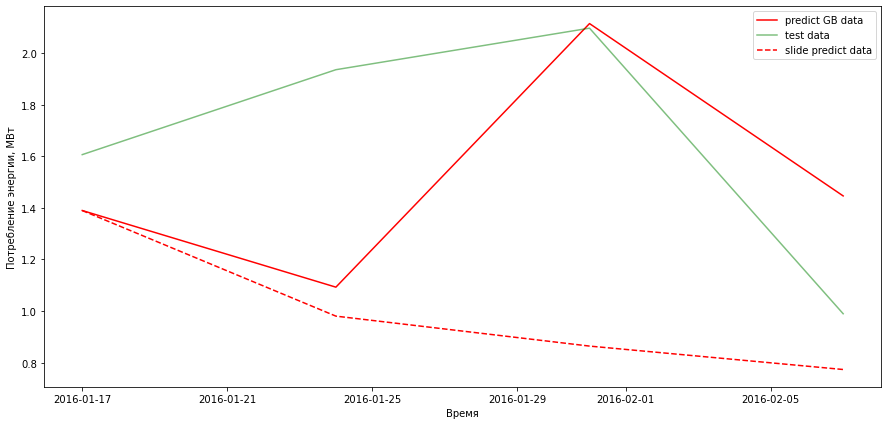

In [120]:
# h=1

#['PJME_MW', 't13', 't12', 't11', 't9', 'diff1_l', 't2', 't1', 't25']
#   0          1      2      3      4       5        6     7     8

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 4
for i in range(N10):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,9)))
   
    
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = y_test_100[i]
    X_test_100[i+1,1] = X_test_100[i-13 + 1,0]
    X_test_100[i+1,2] = X_test_100[i-12 + 1,0]
    X_test_100[i+1,3] = X_test_100[i-11 + 1,0]
    X_test_100[i+1,4] = X_test_100[i-9 + 1,0]
    X_test_100[i+1,5] = (np.log(scl_target.inverse_transform(y_test_100[i:i+1])) - scl_x.mean_[12]) / scl_x.scale_[12]
    X_test_100[i+1,6] = X_test_100[i-2 + 1,0]
    X_test_100[i+1,7] = X_test_100[i-1 + 1,0]
    X_test_100[i+1,8] = X_test_100[i-25 + 1,0]

    
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [121]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.591757262832008 %


In [122]:
for j in [0,10,20,30,40]:
    er_100j = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[j:j+10]),y_pred = scl_target.inverse_transform( y_test_100[p+1+j:j+10+p+1]))

    print('ошибка рекурсивной модели на отрезке',j,':',j+10,'  MAPE :  ', er_100j,'%')

ошибка рекурсивной модели на отрезке 0 : 10   MAPE :   14.431226584026785 %
ошибка рекурсивной модели на отрезке 10 : 20   MAPE :   5.546793896410283 %
ошибка рекурсивной модели на отрезке 20 : 30   MAPE :   12.394927119358215 %
ошибка рекурсивной модели на отрезке 30 : 40   MAPE :   9.428597748813525 %
ошибка рекурсивной модели на отрезке 40 : 50   MAPE :   10.179327851578527 %


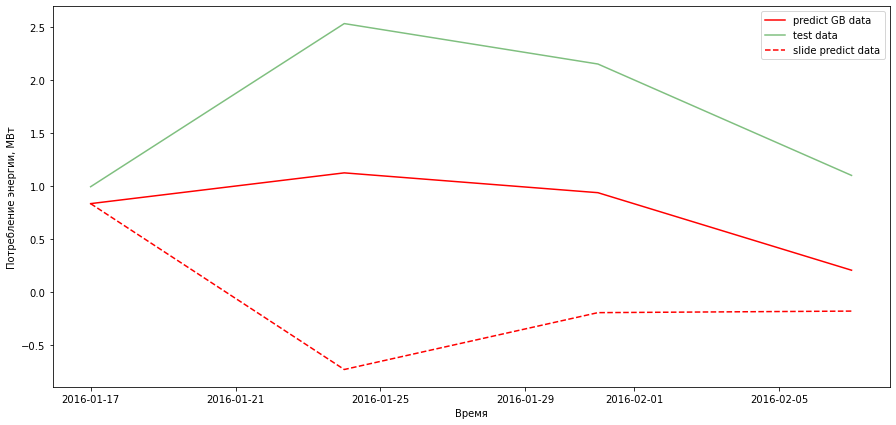

In [88]:
# h=4

#['month', 't11', 't10', 't9', 't8', 't7', 't23', 't22', 't21']
#   0        1      2     3     4     5      6      7      8

X_test_100 = X_test.copy()
y_test_100 = y_test_pred_g.copy()
N10 = 4
for i in range(N10):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,9)))
   
    
    # заполняем вектор для прогноза следующей точки
    if not i%4:
        X_test_100[i+1,0] = X_test_100[i,0] + 1
    X_test_100[i+1,1] = X_test_100[i-11 + 1,0]
    X_test_100[i+1,2] = X_test_100[i-10 + 1,0]
    X_test_100[i+1,3] = X_test_100[i-9 + 1,0]
    X_test_100[i+1,4] = X_test_100[i-8 + 1,0]
    X_test_100[i+1,5] = X_test_100[i-7 + 1,0]
    X_test_100[i+1,6] = X_test_100[i-23 + 1,0]
    X_test_100[i+1,7] = X_test_100[i-22 + 1,0]
    X_test_100[i+1,8] = X_test_100[i-21 + 1,0]

    
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+1],y_test_pred_g[:N10], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+1],y_test[:N10], 'g',label='test data', alpha=0.5)
plt.plot(test.index[1:N10+1],y_test_100[:N10], '--r',label='slide predict data')

plt.legend()
plt.show()    

In [89]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[:N10]),y_pred = scl_target.inverse_transform( y_test_100[:N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   17.41671904632919 %


In [90]:
for j in [0,10,20,30,40]:
    er_100j = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[j:j+10]),y_pred = scl_target.inverse_transform( y_test_100[p+1+j:j+10+p+1]))

    print('ошибка рекурсивной модели на отрезке',j,':',j+10,'  MAPE :  ', er_100j,'%')

ошибка рекурсивной модели на отрезке 0 : 10   MAPE :   8.659902580244932 %
ошибка рекурсивной модели на отрезке 10 : 20   MAPE :   7.015811846175804 %
ошибка рекурсивной модели на отрезке 20 : 30   MAPE :   15.900891121568892 %
ошибка рекурсивной модели на отрезке 30 : 40   MAPE :   5.0924873127509045 %
ошибка рекурсивной модели на отрезке 40 : 50   MAPE :   11.004250977312173 %
